<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook 8</p></tp>
            <tp><p style="font-size:150%;text-align:center">El mundo del Wumpus</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---


# Objetivo <a class="anchor" id="inicio"></a>

Vamos a entrar de lleno en el enfoque basado en agentes de la Inteligencia Artificial. Para comprender mejor este enfoque debemos tomar la perspectiva de un agente que tiene que superar un reto en un minimundo. En este notebook, el minimundo es el mundo del Wumpus y uno de los objetivos de este notebook es familiarizarnos con dicho entorno. Adicionalmente, implementaremos un programa de agente muy sencillo (un agente de reflejo simple), el cual nos servirá para darnos cuenta de qué otros recursos debe tener a su disposición el agente para cumplir la meta de encontrar el oro en la caverna del Wumpus (sin morir en el intento). Finalizaremos haciendo una representación de algunas de las reglas de este mundo mediante la lógica proposicional.

Adaptado de Russell & Norvig (2016), cap. 7.

# Secciones

En este notebook desarrollaremos los siguientes aspectos del problema:

* [El mundo del Wumpus.](#wumpus)
* [Agente de reflejo simple.](#simple-reflex)
* [Representando el mundo mediante lógica proposicional.](#representacion)
* [Agente basado en objetivos.](#goalba)

# El mundo del Wumpus <a class="anchor" id="wumpus"></a>

([Volver al inicio](#inicio))

El siguiente problema se conoce como *El mundo del Wumpus* (Yob, 1975). Imagine una caverna muy oscura, representada por una rejilla de $4\times 4$ rodeada de muros. Un agente (nuestro héroe de la historia) puede entrar y salir de la caberna por la casilla (0,0) y puede percibir solamente lo que hay en cada casilla en la que se encuentre. En la caverna hay pozos muy profundos; si cae en uno de ellos, morirá. Lo peor de todo es que hay un mounstro, conocido como el Wumpus, el cual se comerá vivo al agente si éste entra a su casilla. ¿Por qué el agente entraría a un lugar como este? ¡Porque en alguna casilla de la cueva hay un montón de oro!

<img src="./imagenes/ejemplo.png" width="400">

Las siguientes son las reglas que gobiernan el mundo:

* En cualquier casilla adyacente (no diagonalmente) a un pozo se percibe una brisa; 
* En cualquier casilla adyacente (no diagonalmente) al Wumpus se percibe un hedor; 
* En la casilla donde se encuentra el oro se percibe un brillo. 
* El wumpus nunca se mueve de su casilla.

Finalmente, el agente tiene un arco y solo una flecha, con la cual puede matar al Wumpus. Cuando el agente dispara la flecha, ésta seguirá en la misma dirección del agente hasta golpear un muro o clavarse en el Wumpus, quien morirá arrojando un desgarrador grito "Aaaaaaarrrrgghhhhh".

**Ejercicio 1:**

De acuerdo con la formulación de entornos hecha al comienzo del curso, ¿cuáles características considera usted que tiene este problema?

**Ayuda:** Puede usar el comando `$\checkmark$` para poner un chulito en la opción que desee marcar. 

| Opción 1 | Opción 2 |
| :---: | :---: |
| Completamente observable | $\checkmark$ Parcialmente observable|
| $\checkmark$ Agente único | Multiagente |
|  Determinista | $\checkmark$ Estocástico |
| Episódico    | $\checkmark$ Secuencial  |
| $\checkmark$ Estático     | dinámico    |
| $\checkmark$ Discreto     | continuo    |
| $\checkmark$ Conocido     | desconocido |

----

La **definición formal del entorno** se hace con base en la definición de las siguientes características:

* **Entorno**: Una cueva representada por una rejilla $4\times 4$ bordeada por muros. El agente siempre comienza en (0, 0) mirando a la derecha. La ubicación del Wumpus se escoge arbitrariamente de manera uniforme en casillas distintas a la inicial. Cualquier casilla distinta de la inicial puede ser un pozo con probabilidad 0.2. El oro puede estar en cualquier casilla, con probabilidad uniforme.

* **Actuadores**: El héroe puede moverse `adelante` por una casilla (no es posible moverse adelante cuando hay un muro), `voltearIzquierda` por 90º, o `voltearDerecha` por 90º. Es posible `agarrar` el oro cuando este está en la casilla ocupada por el héroe. También puede `disparar` la flecha en la dirección en que está mirando, la cual seguirá en linea recta hasta golpear un muro. Finalmente, el agente puede `salir` de la cueva, pero solo desde la casilla inicial.

* **Sensores**: El héroe percibe un `hedor` cuando llega a la casilla donde está el Wumpus o cuando llega a una de las casillas adyacentes (no diagonalmente). En las casillas adyacentes a un pozo, percibe una `brisa`. En el cuadro donde está el oro, percibe un `brillo`. Cuando se topa con un muro, percibe un `batacazo`. Finalmente, si el Wumpus muere, el heroe percibe un `grito` desde cualquier casilla.

* **Medida de desempeño**: +1000 por salir de la cueva con el oro; -1000 por caer en un pozo o ser comido por el Wumpus; -1 por cada acción y -10 por usar la flecha. El juego termina cuando el heroe muere o sale de la cueva.


**Implementación del entorno**

Implementaremos el mundo del Wumpus mediante una clase en Python.

Primero cargamos librerías:

In [1]:
from logica import *
from entornos import *
from agentes import *

Inicializamos el mundo y percibimos lo que hay en la primera casilla:

[None, 'brisa', None, None, None]


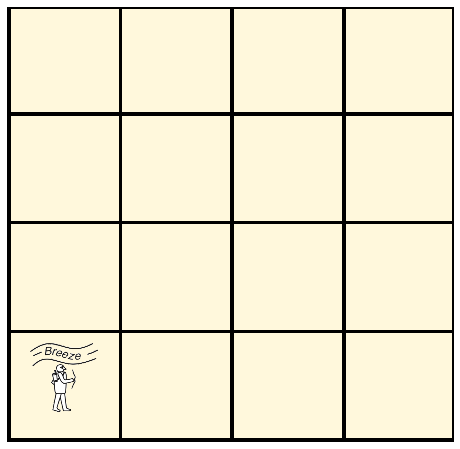

In [2]:
W = Wumpus(wumpus=(3,3), oro=(2,2), pozos=[(1,0), (3,1)])
W.pintar_casilla()
agente = Agente()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

Un paso arriesgado en la oscuridad:

[None, None, None, None, None]


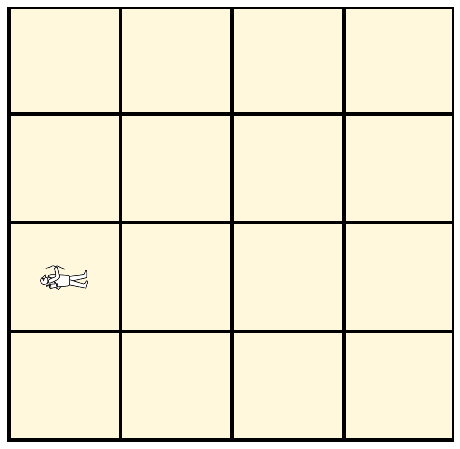

In [3]:
W.transicion('voltearIzquierda')
W.transicion('adelante')
W.pintar_casilla()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

**Ejercicio 2:**

Escriba el código para que desde la casilla a la que llegó en la ejecución de la celda anterior (que es la (0,1)) el héroe avance dos casillas a la derecha y una arriba, percibiendo el entorno a cada paso.

---

[None, 'brisa', None, None, None]


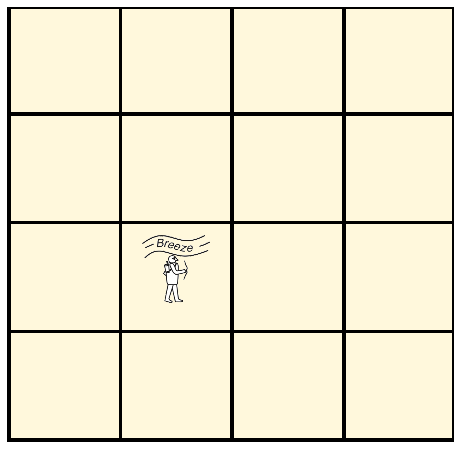

In [4]:
W.transicion('voltearDerecha')
W.transicion('adelante')
W.pintar_casilla()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

[None, 'brisa', None, None, None]


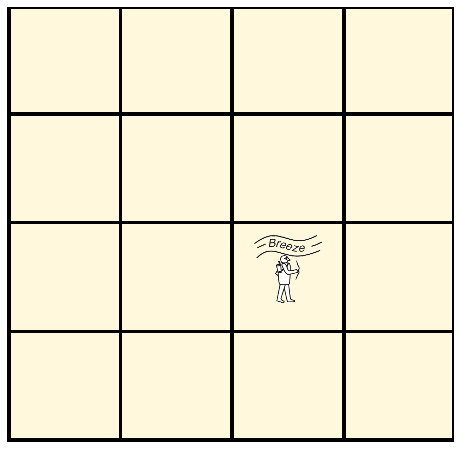

In [5]:
W.transicion('adelante')
W.pintar_casilla()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

[None, None, 'brillo', None, None]


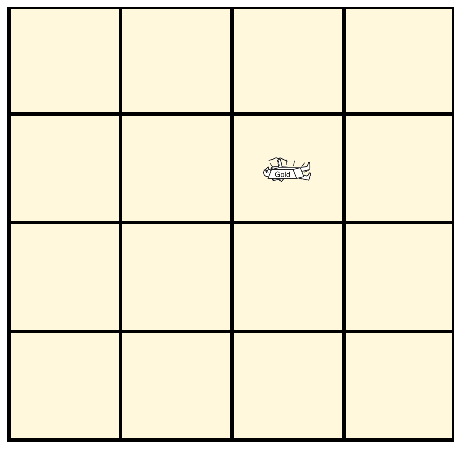

In [6]:
W.transicion('voltearIzquierda')
W.transicion('adelante')
W.pintar_casilla()
agente.perceptos = W.para_sentidos()
print(agente.perceptos)

# Agente de reflejo simple <a class="anchor" id="simple-reflex"></a>

([Volver al inicio](#inicio))

Ya que tenemos alguna familiaridad con el mundo del Wumpus, vamos a implementar nuestro primer agente que va a enfrentarse al reto de buscar el oro en esa aterradora caverna. Este agente será de reflejo simple:

<img src="./imagenes/env-simple-reflex.png" width="400">

Las reglas de condición-acción que implementaremos serán las siguientes:

* Si percibe el brillo, tomar el oro.
* Si siente un batacazo, escoja aleatoriamente si voltearse a la derecha, izquerda o regresarse y avanzar una casilla.
* Si no percibe ni brisa ni hedor, avanzar una casilla.
* Si percibe un hedor o una brisa, devolverse.


In [7]:
from random import choice

# perceptos[0]  =>  hedor
# perceptos[1]  =>  brisa
# perceptos[2]  =>  brillo
# perceptos[3]  =>  batacazo
# perceptos[4]  =>  grito
reglas = {
    # Si percibe el brillo, tomar el oro.
    'self.perceptos[2]': "['agarrar']",
    
    # Si siente un batacazo, escoja aleatoriamente si voltearse 
    # a la derecha, izquerda o regresarse y avanzar una casilla.
    'self.perceptos[3]': "choice([['voltearIzquierda', 'adelante'], ['voltearDerecha', 'adelante'], ['voltearIzquierda', 'voltearIzquierda', 'adelante']])",    
    
    # Si no percibe ni hedor ni brisa, avanzar una casilla.
    'not self.perceptos[0] and not self.perceptos[1]': "['adelante']",
    
    # Si percibe un hedor o una brisa, devolverse.
    'self.perceptos[0] or self.perceptos[1]': "['voltearIzquierda', 'voltearIzquierda', 'adelante']",
}

def programaSR(self, DEB=False):
    reaccion = self.reglas
    for antecedente in self.reglas:
        if eval(antecedente):
            self.acciones += eval(reaccion[antecedente])
            if DEB:
                print(reaccion[antecedente])
            break

setattr(Agente, 'programa', programaSR)

Simulamos el complortamiento del agente para evaluar su eficiencia al enfrentarse al problema del mundo del Wumpus. Trate de analizar las fortalezas y falencias del agente en el siguiente mundo. Corra la celda más de una vez, pues el agente tiene un componente aleatorio que hay que evaluar sobre varios intentos:

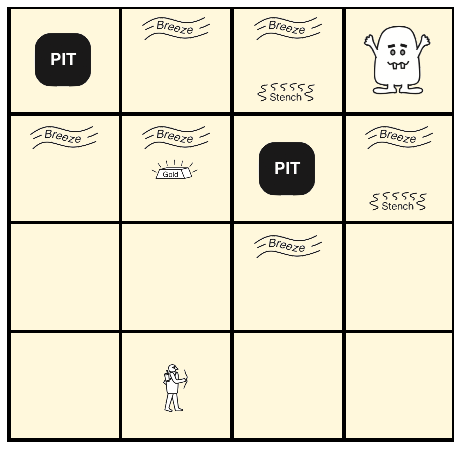

In [8]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente()
agente.reglas = reglas
max_turnos = 30
W.pintar_todo()
plt.show()

for t in range(max_turnos):
    agente.perceptos = W.para_sentidos()
    a = agente.reaccionar()
    W.transicion(a)    
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()
    sleep(.25) 


Ahora hagamos el mismo ejercicio en el siguiente mundo, en donde hemos cambiado el oro de posición. Corra la celda más de una vez, pues el agente tiene un componente aleatorio que hay que evaluar sobre varios intentos:

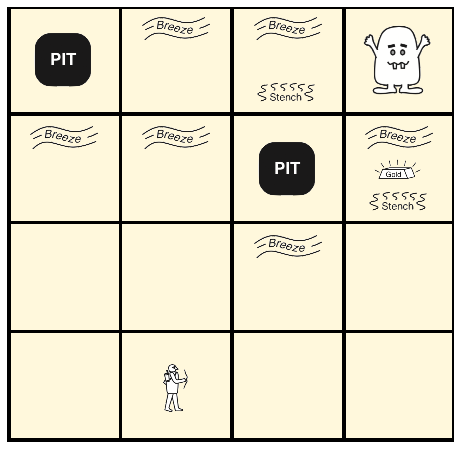

In [9]:
from time import sleep
from IPython.display import clear_output

W = Wumpus(wumpus=(3,3), oro=(3,2), pozos=[(0,3), (2,2)])
agente = Agente()
agente.reglas = reglas
max_turnos = 30
W.pintar_todo()
plt.show()

for t in range(max_turnos):
    agente.perceptos = W.para_sentidos()
    a = agente.reaccionar()
    W.transicion(a)    
    if not W.juego_activo:
        clear_output(wait=True)
        print(W.mensaje)
        break
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()
    sleep(.25) 

**Ejercicio 3:**

Haga una tabla con una columna para las fortalezas y otra para las falencias del agente.

**Respuesta:**

| Fortalezas | Falencias |
| :---: | :---: |
| FORTALEZA 1 | FALECIA 1 |
| FORTALEZA 2 | FALECIA 2 |

---

# Representación del mundo del Wumpus en lógica proposicional <a class="anchor" id="representacion"></a>

([Volver al inicio](#inicio))

Después de correr varias veces la simulación del agente de reflejo simple, por lo menos una cosa debe ser clara. El agente no recorre todas las casillas que podría recorrer. Es obvio que el agente necesita poder decidir, con base en la información sensorial a su disposición y su memoria sobre el pasado, cuáles casillas son seguras para transitar y así explorar una mayor parte de la caverna. En otras palabras, el agente necesita un modelo del mundo.

**Agente basado en un modelo del mundo**

Vamos a  representar situaciones del Mundo del Wumpus para pasar a la arquitectura de un *agente basado en un modelo*. (*model-based agent*). La siguiente imagen presenta un esquema de este tipo de agente:

<img src="./imagenes/model-based1.png" width="400">

Para lograr esto, podemos hacer que el agente sea capaz de:

* Representar las reglas del mundo del Wumpus.
* Combinar información sensorial con las reglas del mundo.
* Razonar sobre cuáles casillas adyacentes es seguro visitar.
* Deambular por las casillas seguras hasta encontrar el oro o agotar todas las casillas seguras y devolverse a la salida (e irse con el rabo entre las piernas). 

**Letras proposicionales:**

Para comenzar la representación del Mundo del Wumpus, usaremos las siguientes letras proposicionales (más adelante incluiremos más):

* `hedor_t` es verdadero sii el agente huele un hedor en el turno $t$.
* `brisa_t` es verdadero sii el agente siente una brisa en el turno $t$.
* `brillo_t` es verdadero sii el agente ve un brillo en el turno $t$.
* `batacazo_t` es verdadero sii el agente siente un batacazo en el turno $t$.
* `grito_t` es verdadero sii el agente escucha un grito en el turno $t$.
* `pozo(x, y)` es verdadero sii en la casilla $(x,y)$ hay un pozo.
* `wumpus(x, y)` es verdadero sii en la casilla $(x,y)$ está el Wumpus.
* `segura(x, y)` es verdadero sii la casilla $(x,y)$ es segura para transitar.

**De percepciones a fórmulas**

Ahora usamos fórmulas de la lógica proposicional para representar aspectos del mundo. Lo primero que haremos será representar las percepciones del agente mediante una conjunción de literales. Las percepciones del agente vienen dadas mediante una lista:

['hedor'/None, 'brisa'/None, 'brillo'/None, 'batacazo'/None, 'grito'/None]

Usando el método `interp_percepto()` de la clase `Agente` obtenemos una fórmula con la conjunción de letras proposionales que representan los perceptos, indexados por el turno:

-hedor_1Y-brisa_1Y-brillo_1Y-batacazo_1Y-grito_1


<AxesSubplot:>

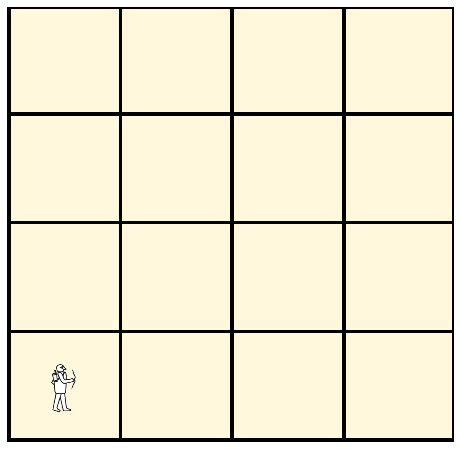

In [10]:
from agentes import *
from entornos import *
from logica import *
W = Wumpus()
agente = Agente()
agente.perceptos = W.para_sentidos()
print(agente.interp_percepto(mundo='wumpus'))
W.pintar_casilla()

**Representando el mundo mediante reglas**

Ahora consideramos la información sobre la relación entre los pozos y la brisa. Observe que las reglas del mundo dicen que en las casillas adyacentes a un pozo se siente una brisa. De manera equivalente, se sigue que si el agente no siente una briza en una casilla, entonces no hay un pozo en las casillas adyacentes. Resulta natural representar esto como una implicación:

Si el agente está en $(0,0)$ y no siente una brisa, entonces no hay pozo en $(1,0)$ ni en $(0,1)$.

No obstante, vamos a ceñirnos a las limitaciones de la base de conocimiento. Esto es, vamos a usar solo el lenguaje de las reglas. Así pues, en lugar de una única fórmula, debemos incluir en la base de conocimiento las dos siguientes reglas:

* Si estoy en $(0,0)$ y no percibo una brisa, no hay pozo en $(1,0)$ 
* Si estoy en $(0,0)$ y no percibo una brisa, no hay pozo en $(0,1)$ 

Y esto para cada casilla:

* Si estoy en $(1,0)$ y no percibo una brisa, no hay un pozo en $(0,0)$ 
* Si estoy en $(1,0)$ y no percibo una brisa, no hay un pozo en $(2,0)$ 
* Si estoy en $(1,0)$ y no percibo una brisa, no hay un pozo en $(1,1)$ 
* $\vdots$

La forma general de todas estas reglas es que si el agente está en la casilla $(x,y)$ y no siente una brisa, entonces no hay pozo en ninguna de sus casillas adyacentes.

In [11]:
def brisa_pozo(self):
    
    def truncar(x):
        if x < 0:
            return 0
        elif x > 3:
            return 3
        else:
            return x

    def adyacentes(casilla):
        x, y = casilla
        adyacentes = [
            (truncar(x - 1), y), (truncar(x + 1), y),
            (x, truncar(y - 1)), (x, truncar(y + 1))
        ]
        adyacentes = [c for c in adyacentes if c != casilla]
        return adyacentes
    
    turno = agente.turno
    casillas = adyacentes(agente.loc)
    x, y = agente.loc
    formulas = []
    for c in casillas:
        x1, y1 = c
        formulas += [
            f'en({x},{y})_{turno}Y-brisa_{turno}>-pozo({x1},{y1})',                
        ]
    return formulas

setattr(Agente, 'brisa_pozo', brisa_pozo)

agente = Agente()
agente.brisa_pozo()

['en(0,0)_1Y-brisa_1>-pozo(1,0)', 'en(0,0)_1Y-brisa_1>-pozo(0,1)']

**Ejercicio 4:**

Escriba un código que genere una lista de fórmulas `hedor_wumpus` que contenga todas las implicaciones sobre la relación entre el Wumpus y el hedor dependiendo de la casilla en que se encuentra el agente.

Si el agente está en la casilla $(0,0)$, la respuesta debe ser:

```
['en(0,0)_1Y-hedor_1>-wumpus(1,0)', 'en(0,0)_1Y-hedor_1>-wumpus(0,1)']
```

In [12]:
def hedor_wumpus(self):
    
    def truncar(x):
        if x < 0:
            return 0
        elif x > 3:
            return 3
        else:
            return x

    def adyacentes(casilla):
        x, y = casilla
        adyacentes = [
            (truncar(x - 1), y), (truncar(x + 1), y),
            (x, truncar(y - 1)), (x, truncar(y + 1))
        ]
        adyacentes = [c for c in adyacentes if c != casilla]
        return adyacentes
    
    formulas = []
    turno    = agente.turno
    casillas = adyacentes(agente.loc)
    x, y     = agente.loc
    
    # AQUÍ COMENZA SU CÓDIGO
    for c in casillas:
        x1, y1 = c
        formulas += [
            f'en({x},{y})_{turno}Y-hedor_{turno}>-wumpus({x1},{y1})',                
        ]
    # AQUÍ TERMINA SU CÓDIGO
    
    return formulas

setattr(Agente, 'hedor_wumpus', hedor_wumpus)

agente = Agente()
agente.hedor_wumpus()

['en(0,0)_1Y-hedor_1>-wumpus(1,0)', 'en(0,0)_1Y-hedor_1>-wumpus(0,1)']

---

**Ejercicio 5:**

Escriba un código que genere una lista de fórmulas `casilla_segura`, la cual debe contener todas reglas que dicen que si en una casilla no hay ni pozo ni Wumpus, entonces es segura. (Vamos a ignorar por el momento el hecho de que la casilla sería segura incluso habiendo hedor, porque el Wumpus podría no estar vivo.)

* Si no hay ni pozo ni Wumpus en $(0,0)$, entonces $(0,0)$ es segura.
* $\vdots$

La respuesta debe ser:

```
['-pozo(0,0)Y-wumpus(0,0)>segura(0,0)',
 '-pozo(0,1)Y-wumpus(0,1)>segura(0,1)',
 '-pozo(0,2)Y-wumpus(0,2)>segura(0,2)',
 '-pozo(0,3)Y-wumpus(0,3)>segura(0,3)',
 '-pozo(1,0)Y-wumpus(1,0)>segura(1,0)',
 '-pozo(1,1)Y-wumpus(1,1)>segura(1,1)',
 '-pozo(1,2)Y-wumpus(1,2)>segura(1,2)',
 '-pozo(1,3)Y-wumpus(1,3)>segura(1,3)',
 '-pozo(2,0)Y-wumpus(2,0)>segura(2,0)',
 '-pozo(2,1)Y-wumpus(2,1)>segura(2,1)',
 '-pozo(2,2)Y-wumpus(2,2)>segura(2,2)',
 '-pozo(2,3)Y-wumpus(2,3)>segura(2,3)',
 '-pozo(3,0)Y-wumpus(3,0)>segura(3,0)',
 '-pozo(3,1)Y-wumpus(3,1)>segura(3,1)',
 '-pozo(3,2)Y-wumpus(3,2)>segura(3,2)',
 '-pozo(3,3)Y-wumpus(3,3)>segura(3,3)']
```

In [13]:
def casilla_segura(self):
    formulas = []
    # AQUÍ COMENZA SU CÓDIGO
    casillas = [(x, y) for x in range(4) for y in range(4)]

    for xi, yi in casillas:

        formulas += [
            f'-pozo({xi},{yi})Y-wumpus({xi},{yi})>segura({xi},{yi})',
        ]
    
    # AQUÍ TERMINA SU CÓDIGO
    return formulas

setattr(Agente, 'casilla_segura', casilla_segura)

agente = Agente()
agente.casilla_segura()

['-pozo(0,0)Y-wumpus(0,0)>segura(0,0)',
 '-pozo(0,1)Y-wumpus(0,1)>segura(0,1)',
 '-pozo(0,2)Y-wumpus(0,2)>segura(0,2)',
 '-pozo(0,3)Y-wumpus(0,3)>segura(0,3)',
 '-pozo(1,0)Y-wumpus(1,0)>segura(1,0)',
 '-pozo(1,1)Y-wumpus(1,1)>segura(1,1)',
 '-pozo(1,2)Y-wumpus(1,2)>segura(1,2)',
 '-pozo(1,3)Y-wumpus(1,3)>segura(1,3)',
 '-pozo(2,0)Y-wumpus(2,0)>segura(2,0)',
 '-pozo(2,1)Y-wumpus(2,1)>segura(2,1)',
 '-pozo(2,2)Y-wumpus(2,2)>segura(2,2)',
 '-pozo(2,3)Y-wumpus(2,3)>segura(2,3)',
 '-pozo(3,0)Y-wumpus(3,0)>segura(3,0)',
 '-pozo(3,1)Y-wumpus(3,1)>segura(3,1)',
 '-pozo(3,2)Y-wumpus(3,2)>segura(3,2)',
 '-pozo(3,3)Y-wumpus(3,3)>segura(3,3)']

---

**De nuevo un mapa mental**

El agente en el mundo del Wumpus también requiere un mapa mental. Definimos entonces las letras proposicionales para guardar la información de la casilla en que está el agente, mirando en qué dirección y cuáles casillas ha visitado:

* en(x,y)_t es verdadero sii el agente está en la casilla $(x,y)$ en el turno $t$.
* midando_o_t es verdadero sii el agente está mirando al oeste en el turno $t$.
* midando_e_t es verdadero sii el agente está mirando al este en el turno $t$.
* midando_s_t es verdadero sii el agente está mirando al sur en el turno $t$.
* midando_n_t es verdadero sii el agente está mirando al norte en el turno $t$.
* visitada(x,y)_t es verdadera sii el agente ha visitado la casilla $(x,y)$ en algún turno $t'\leq t$.

Y definimos todos los fluentes mencionados en el notebook anterior sobre el agente en el laberinto y que hacen relación a la creación de un mapa mental:

In [14]:
def fluentes_mapa_mental(self):
    turno = self.turno
    x, y = self.loc
    formulas = [
        # ACCIONES QUE NO CAMBIAN LA POSICIÓN 
        f'en({x},{y})_{turno}YvoltearIzquierda_{turno}>en({x},{y})_{turno+1}',
        f'en({x},{y})_{turno}YvoltearDerecha_{turno}>en({x},{y})_{turno+1}',
        f'en({x},{y})_{turno}Yagarrar_{turno}>en({x},{y})_{turno+1}',
        # ACCIÓN QUE CAMBIA LA POSICIÓN
        f'en({x},{y})_{turno}Ymirando_o_{turno}Yadelante_{turno}>en({x-1},{y})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_e_{turno}Yadelante_{turno}>en({x+1},{y})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_s_{turno}Yadelante_{turno}>en({x},{y-1})_{turno+1}',
        f'en({x},{y})_{turno}Ymirando_n_{turno}Yadelante_{turno}>en({x},{y+1})_{turno+1}',
        # ACCIONES QUE NO CAMBIAN LA DIRECCIÓN
        f'mirando_o_{turno}Yadelante_{turno}>mirando_o_{turno+1}',
        f'mirando_s_{turno}Yadelante_{turno}>mirando_s_{turno+1}',
        f'mirando_e_{turno}Yadelante_{turno}>mirando_e_{turno+1}',
        f'mirando_n_{turno}Yadelante_{turno}>mirando_n_{turno+1}',
        f'mirando_o_{turno}Yagarrar_{turno}>mirando_o_{turno+1}',
        f'mirando_s_{turno}Yagarrar_{turno}>mirando_s_{turno+1}',
        f'mirando_e_{turno}Yagarrar_{turno}>mirando_e_{turno+1}',
        f'mirando_n_{turno}Yagarrar_{turno}>mirando_n_{turno+1}',
        # ACCIONES QUE CAMBIAN LA DIRECCIÓN
        f'mirando_o_{turno}YvoltearIzquierda_{turno}>mirando_s_{turno+1}',
        f'mirando_s_{turno}YvoltearIzquierda_{turno}>mirando_e_{turno+1}',
        f'mirando_e_{turno}YvoltearIzquierda_{turno}>mirando_n_{turno+1}',
        f'mirando_n_{turno}YvoltearIzquierda_{turno}>mirando_o_{turno+1}',
        f'mirando_o_{turno}YvoltearDerecha_{turno}>mirando_n_{turno+1}',
        f'mirando_n_{turno}YvoltearDerecha_{turno}>mirando_e_{turno+1}',
        f'mirando_e_{turno}YvoltearDerecha_{turno}>mirando_s_{turno+1}',
        f'mirando_s_{turno}YvoltearDerecha_{turno}>mirando_o_{turno+1}',
    ]
    casillas = [(x,y) for x in range(12) for y in range(12)]
    for c in casillas:
        x, y = c
        formulas += [
            f'en({x},{y})_{turno}>visitada({x},{y})_{turno}',                
            f'visitada({x},{y})_{turno}>visitada({x},{y})_{turno+1}',                
        ]
    return formulas

setattr(Agente, 'fluentes_mapa_mental', fluentes_mapa_mental)

agente = Agente()
agente.fluentes_mapa_mental()

['en(0,0)_1YvoltearIzquierda_1>en(0,0)_2',
 'en(0,0)_1YvoltearDerecha_1>en(0,0)_2',
 'en(0,0)_1Yagarrar_1>en(0,0)_2',
 'en(0,0)_1Ymirando_o_1Yadelante_1>en(-1,0)_2',
 'en(0,0)_1Ymirando_e_1Yadelante_1>en(1,0)_2',
 'en(0,0)_1Ymirando_s_1Yadelante_1>en(0,-1)_2',
 'en(0,0)_1Ymirando_n_1Yadelante_1>en(0,1)_2',
 'mirando_o_1Yadelante_1>mirando_o_2',
 'mirando_s_1Yadelante_1>mirando_s_2',
 'mirando_e_1Yadelante_1>mirando_e_2',
 'mirando_n_1Yadelante_1>mirando_n_2',
 'mirando_o_1Yagarrar_1>mirando_o_2',
 'mirando_s_1Yagarrar_1>mirando_s_2',
 'mirando_e_1Yagarrar_1>mirando_e_2',
 'mirando_n_1Yagarrar_1>mirando_n_2',
 'mirando_o_1YvoltearIzquierda_1>mirando_s_2',
 'mirando_s_1YvoltearIzquierda_1>mirando_e_2',
 'mirando_e_1YvoltearIzquierda_1>mirando_n_2',
 'mirando_n_1YvoltearIzquierda_1>mirando_o_2',
 'mirando_o_1YvoltearDerecha_1>mirando_n_2',
 'mirando_n_1YvoltearDerecha_1>mirando_e_2',
 'mirando_e_1YvoltearDerecha_1>mirando_s_2',
 'mirando_s_1YvoltearDerecha_1>mirando_o_2',
 'en(0,0)_1>visi

### Inferencias y queries

Ya tenemos todo lo que necesitamos para crear una base de conocimiento inicial. Con esta base podemos implementar un programa de agente que permita transitar por todas las casillas seguras. 

Comenzamos por inicializar la base de conocimiento así:

* Los datos serán la percepción sensorial, y la posición y dirección actual.
* Las reglas son la dinámica del mundo que hemos codificado hasta ahora. Estas reglas incluyen:
    - `brisa_pozo`
    - `hedor_wumpus`
    - `casilla_segura`
    - `fluentes_mapa_mental`

In [15]:
W = Wumpus(wumpus=(0,2), oro=(3,2), pozos=[(2,0)])
agente = Agente()
formulas = agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += agente.fluentes_mapa_mental()
formulas += [f'en(0,0)_1', 'mirando_e_1']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
print("¡Base de conocimiento creada!")
print(agente.base)
# W.pintar_casilla()

¡Base de conocimiento creada!
Datos:
en(0,0)_1
mirando_e_1
-hedor_1
-brisa_1
-brillo_1
-batacazo_1
-grito_1

Reglas:
en(0,0)_1Y-brisa_1>-pozo(1,0)
en(0,0)_1Y-brisa_1>-pozo(0,1)
en(0,0)_1Y-hedor_1>-wumpus(1,0)
en(0,0)_1Y-hedor_1>-wumpus(0,1)
-pozo(0,0)Y-wumpus(0,0)>segura(0,0)
-pozo(0,1)Y-wumpus(0,1)>segura(0,1)
-pozo(0,2)Y-wumpus(0,2)>segura(0,2)
-pozo(0,3)Y-wumpus(0,3)>segura(0,3)
-pozo(1,0)Y-wumpus(1,0)>segura(1,0)
-pozo(1,1)Y-wumpus(1,1)>segura(1,1)
-pozo(1,2)Y-wumpus(1,2)>segura(1,2)
-pozo(1,3)Y-wumpus(1,3)>segura(1,3)
-pozo(2,0)Y-wumpus(2,0)>segura(2,0)
-pozo(2,1)Y-wumpus(2,1)>segura(2,1)
-pozo(2,2)Y-wumpus(2,2)>segura(2,2)
-pozo(2,3)Y-wumpus(2,3)>segura(2,3)
-pozo(3,0)Y-wumpus(3,0)>segura(3,0)
-pozo(3,1)Y-wumpus(3,1)>segura(3,1)
-pozo(3,2)Y-wumpus(3,2)>segura(3,2)
-pozo(3,3)Y-wumpus(3,3)>segura(3,3)
en(0,0)_1YvoltearIzquierda_1>en(0,0)_2
en(0,0)_1YvoltearDerecha_1>en(0,0)_2
en(0,0)_1Yagarrar_1>en(0,0)_2
en(0,0)_1Ymirando_o_1Yadelante_1>en(-1,0)_2
en(0,0)_1Ymirando_e_1Yadelante_1>

Además, observe que podemos utilizar la función `ASK` de la libreria `logica` para hacer la consulta a la base de conocimiento acerca de si una casilla es segura o no:

In [16]:
objetivo = 'segura(1,0)'
print("Objetivo:", objetivo)
print()
print("Datos:", agente.base.datos)
print()
print("Reglas aplicables para el objetivo:")
reglas_objeto = agente.base.reglas_aplicables(objetivo)
for r in reglas_objeto:
    print(' Y '.join(r.cuerpo), ">", r.cabeza)
res = ASK(objetivo, 'success', agente.base)
print()
print("Resultado de la consulta:", res)

Objetivo: segura(1,0)

Datos: ['en(0,0)_1', 'mirando_e_1', '-hedor_1', '-brisa_1', '-brillo_1', '-batacazo_1', '-grito_1']

Reglas aplicables para el objetivo:
-pozo(1,0) Y -wumpus(1,0) > segura(1,0)

Resultado de la consulta: True


**Ejercicio 6:**

Cree un código que implemente el método `agente.adyacentes_seguras()` que devuelva una lista con las casillas adyacentes seguras de acuerdo a la base de conocimiento del agente.

In [25]:
def adyacentes_seguras(self):
    
    def truncar(x):
        if x < 0:
            return 0
        elif x > 3:
            return 3
        else:
            return x

    def adyacentes(casilla):
        x, y = casilla
        adyacentes = [
            (truncar(x - 1), y), (truncar(x + 1), y),
            (x, truncar(y - 1)), (x, truncar(y + 1))
        ]
        adyacentes = [c for c in adyacentes if c != casilla]
        return adyacentes   
   
    casillas_seguras = []
    # AQUÍ COMIENZA SU CÓDIGO
    for xi, yi in adyacentes(agente.loc) + [self.loc,]:
        
        reglas_objeto = agente.base.reglas_aplicables(f'segura({xi},{yi})')
        for r in reglas_objeto:
            print(' Y '.join(r.cuerpo), ">", r.cabeza)
        
        if ASK(f'segura({xi},{yi})', 'success', agente.base):
            casillas_seguras += [(xi,yi),]
        
    # AQUÍ TERMINA SU CÓDIGO
    return casillas_seguras

setattr(Agente,"adyacentes_seguras",adyacentes_seguras)

Pruebe su código con las siguientes celdas:

In [27]:
W = Wumpus(wumpus=(3,3), pozos=[(2,0), (2,2)])
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
agente.adyacentes_seguras()

-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
-pozo(0,1) Y -wumpus(0,1) > segura(0,1)
-pozo(0,0) Y -wumpus(0,0) > segura(0,0)


[(1, 0), (0, 1)]

La respuesta debe ser:

```
[(1, 0), (0, 1)]
```

In [29]:
W = Wumpus(wumpus=(1,0), oro=(3,2), pozos=[(2,0), (2,2)])
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
agente.adyacentes_seguras()

-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
-pozo(0,1) Y -wumpus(0,1) > segura(0,1)
-pozo(0,0) Y -wumpus(0,0) > segura(0,0)


[]

La respuesta debe ser:

```
[]
```

---

**Estimación de estados**

La base de conocimiento crece cada turno, puesto que vamos incluyendo cada vez más y más reglas y datos en ella. Esto genera, evidentemente, que las consultas sean cada vez más demoradas. Para solucionar este inconveniente, debemos mantener un tamaño relativamente constante de la base de conocimiento. Esto lo logramos mediante una estimación de estado, que consiste en solo guardar la información relevante en memoria del estado actual.

Revise la definición de la clase agente para conocer los métodos relacionados con la estimación de estado.

**Programa basado en un modelo del mundo**

Para completar una versión mínima de nuestro heroe, capaz de entrar en la caverna del Wumpus sin morir en el intento, debemos implementar el programa de agente. Las reglas que sigue el agente son las siguientes:

* Si percibe el brillo (indicando que en esa casilla está el oro), lo agarra.
* Si no percibe brillo, considera las casillas adyacentes seguras que no haya visitado y se dirige a una de ellas.
* Si todas las casillas adyacentes seguras ya han sido visitadas, selecciona una casilla adyacente segura para ir.

In [30]:
def programaKB(self, DEB=False):
    acciones = []
    turno, casilla_actual, direccion, cas_seguras, cas_visitadas = self.cache()
    if DEB:
        print('Turno acutal:', turno)
        print('Casilla actual:', casilla_actual)
        print('Dirección actual:', direccion)
        print('Casillas adyacentes seguras:', cas_seguras)
        print('Casillas visitadas:', cas_visitadas)
    if ASK(f'brillo_{turno}','success',self.base):
        if DEB:
            print('¡Oh, el oro!')
        acciones.append('agarrar')
    else:
        opciones = [casilla for casilla in cas_seguras if casilla not in cas_visitadas]
        if DEB:
            print('Casillas opcionales:', opciones)
        if len(opciones) > 0:
            casilla_ir = choice(opciones)
            if DEB:
                print('El agente quiere ir a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        elif len(cas_seguras) > 0:
            casilla_ir = choice(cas_seguras)
            if DEB:
                print('El agente quiere devolverse a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        else:
            print("¡Caso no contemplado!")
    self.acciones += acciones

setattr(Agente, 'programa', programaKB)

**Explorando de manera segura**

El agente ya puede explorar el entorno de manera segura. Veamos unos cuantos turnos con toda la información que el agente va encontrando y deduciendo durante su exploración:

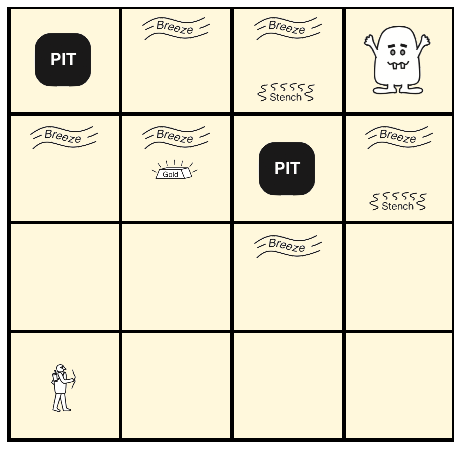

-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
-pozo(0,1) Y -wumpus(0,1) > segura(0,1)
-pozo(0,0) Y -wumpus(0,0) > segura(0,0)
Turno acutal: 1
Casilla actual: (0, 0)
Dirección actual: este
Casillas adyacentes seguras: [(1, 0), (0, 1)]
Casillas visitadas: [(0, 0)]
Casillas opcionales: [(1, 0), (0, 1)]
El agente quiere ir a la casilla (1, 0)
-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
-pozo(0,1) Y -wumpus(0,1) > segura(0,1)
-pozo(0,0) Y -wumpus(0,0) > segura(0,0)


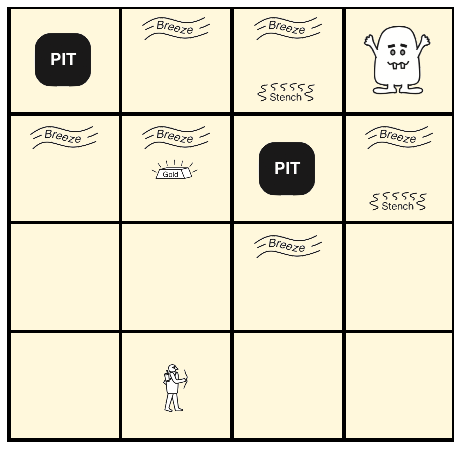

-pozo(0,0) Y -wumpus(0,0) > segura(0,0)
-pozo(2,0) Y -wumpus(2,0) > segura(2,0)
-pozo(1,1) Y -wumpus(1,1) > segura(1,1)
-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
Turno acutal: 2
Casilla actual: (1, 0)
Dirección actual: este
Casillas adyacentes seguras: [(0, 0), (2, 0), (1, 1)]
Casillas visitadas: [(0, 0), (1, 0)]
Casillas opcionales: [(2, 0), (1, 1)]
El agente quiere ir a la casilla (2, 0)
-pozo(0,0) Y -wumpus(0,0) > segura(0,0)
-pozo(2,0) Y -wumpus(2,0) > segura(2,0)
-pozo(1,1) Y -wumpus(1,1) > segura(1,1)
-pozo(1,0) Y -wumpus(1,0) > segura(1,0)


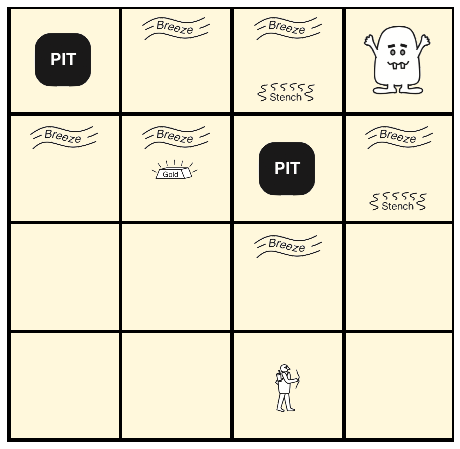

-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
-pozo(3,0) Y -wumpus(3,0) > segura(3,0)
-pozo(2,1) Y -wumpus(2,1) > segura(2,1)
-pozo(2,0) Y -wumpus(2,0) > segura(2,0)
Turno acutal: 3
Casilla actual: (2, 0)
Dirección actual: este
Casillas adyacentes seguras: [(1, 0), (3, 0), (2, 1)]
Casillas visitadas: [(0, 0), (1, 0), (2, 0)]
Casillas opcionales: [(3, 0), (2, 1)]
El agente quiere ir a la casilla (3, 0)
-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
-pozo(3,0) Y -wumpus(3,0) > segura(3,0)
-pozo(2,1) Y -wumpus(2,1) > segura(2,1)
-pozo(2,0) Y -wumpus(2,0) > segura(2,0)


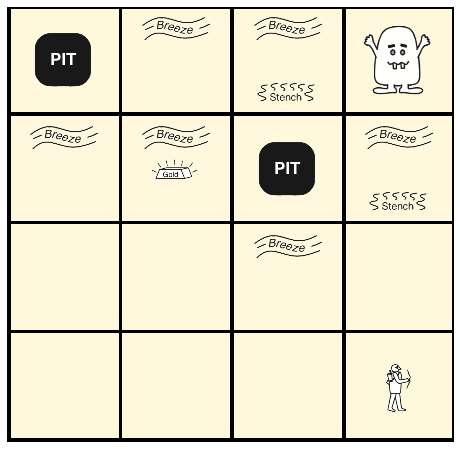

-pozo(2,0) Y -wumpus(2,0) > segura(2,0)
-pozo(3,1) Y -wumpus(3,1) > segura(3,1)
-pozo(3,0) Y -wumpus(3,0) > segura(3,0)
Turno acutal: 4
Casilla actual: (3, 0)
Dirección actual: este
Casillas adyacentes seguras: [(2, 0), (3, 1)]
Casillas visitadas: [(0, 0), (1, 0), (2, 0), (3, 0)]
Casillas opcionales: [(3, 1)]
El agente quiere ir a la casilla (3, 1)
-pozo(2,0) Y -wumpus(2,0) > segura(2,0)
-pozo(3,1) Y -wumpus(3,1) > segura(3,1)
-pozo(3,0) Y -wumpus(3,0) > segura(3,0)


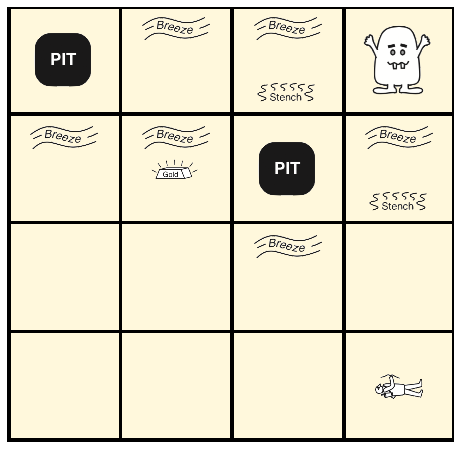

-pozo(2,0) Y -wumpus(2,0) > segura(2,0)
-pozo(3,1) Y -wumpus(3,1) > segura(3,1)
-pozo(3,0) Y -wumpus(3,0) > segura(3,0)


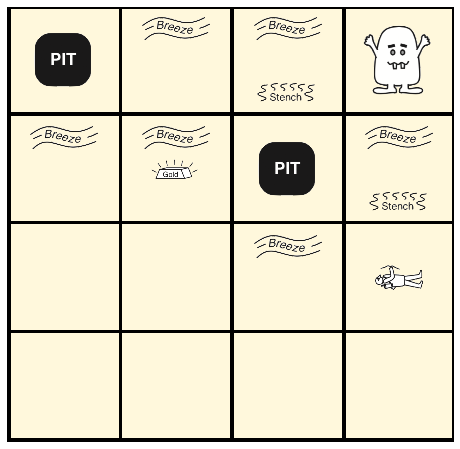

-pozo(2,1) Y -wumpus(2,1) > segura(2,1)
-pozo(3,0) Y -wumpus(3,0) > segura(3,0)
-pozo(3,2) Y -wumpus(3,2) > segura(3,2)
-pozo(3,1) Y -wumpus(3,1) > segura(3,1)
Turno acutal: 6
Casilla actual: (3, 1)
Dirección actual: norte
Casillas adyacentes seguras: [(2, 1), (3, 0), (3, 2)]
Casillas visitadas: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1)]
Casillas opcionales: [(2, 1), (3, 2)]
El agente quiere ir a la casilla (2, 1)
-pozo(2,1) Y -wumpus(2,1) > segura(2,1)
-pozo(3,0) Y -wumpus(3,0) > segura(3,0)
-pozo(3,2) Y -wumpus(3,2) > segura(3,2)
-pozo(3,1) Y -wumpus(3,1) > segura(3,1)


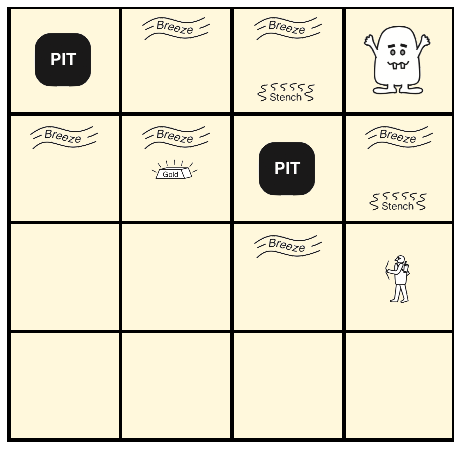

-pozo(2,1) Y -wumpus(2,1) > segura(2,1)
-pozo(3,0) Y -wumpus(3,0) > segura(3,0)
-pozo(3,2) Y -wumpus(3,2) > segura(3,2)
-pozo(3,1) Y -wumpus(3,1) > segura(3,1)


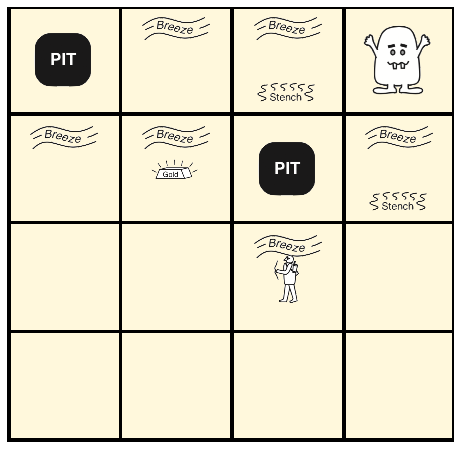

-pozo(1,1) Y -wumpus(1,1) > segura(1,1)
-pozo(3,1) Y -wumpus(3,1) > segura(3,1)
-pozo(2,0) Y -wumpus(2,0) > segura(2,0)
-pozo(2,2) Y -wumpus(2,2) > segura(2,2)
-pozo(2,1) Y -wumpus(2,1) > segura(2,1)
Turno acutal: 8
Casilla actual: (2, 1)
Dirección actual: oeste
Casillas adyacentes seguras: [(1, 1), (3, 1), (2, 0)]
Casillas visitadas: [(0, 0), (1, 0), (2, 0), (2, 1), (3, 0), (3, 1)]
Casillas opcionales: [(1, 1)]
El agente quiere ir a la casilla (1, 1)
-pozo(1,1) Y -wumpus(1,1) > segura(1,1)
-pozo(3,1) Y -wumpus(3,1) > segura(3,1)
-pozo(2,0) Y -wumpus(2,0) > segura(2,0)
-pozo(2,2) Y -wumpus(2,2) > segura(2,2)
-pozo(2,1) Y -wumpus(2,1) > segura(2,1)


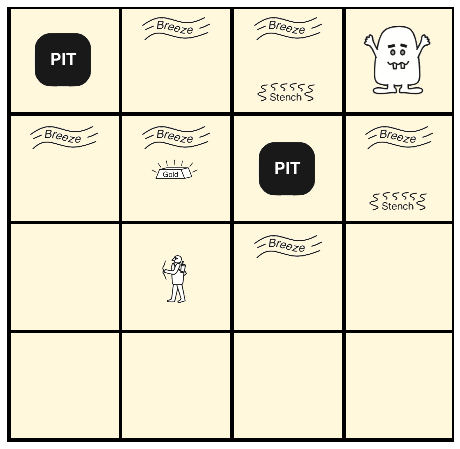

-pozo(0,1) Y -wumpus(0,1) > segura(0,1)
-pozo(2,1) Y -wumpus(2,1) > segura(2,1)
-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
-pozo(1,2) Y -wumpus(1,2) > segura(1,2)
-pozo(1,1) Y -wumpus(1,1) > segura(1,1)
Turno acutal: 9
Casilla actual: (1, 1)
Dirección actual: oeste
Casillas adyacentes seguras: [(0, 1), (2, 1), (1, 0), (1, 2)]
Casillas visitadas: [(0, 0), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1)]
Casillas opcionales: [(0, 1), (1, 2)]
El agente quiere ir a la casilla (1, 2)
-pozo(0,1) Y -wumpus(0,1) > segura(0,1)
-pozo(2,1) Y -wumpus(2,1) > segura(2,1)
-pozo(1,0) Y -wumpus(1,0) > segura(1,0)
-pozo(1,2) Y -wumpus(1,2) > segura(1,2)
-pozo(1,1) Y -wumpus(1,1) > segura(1,1)


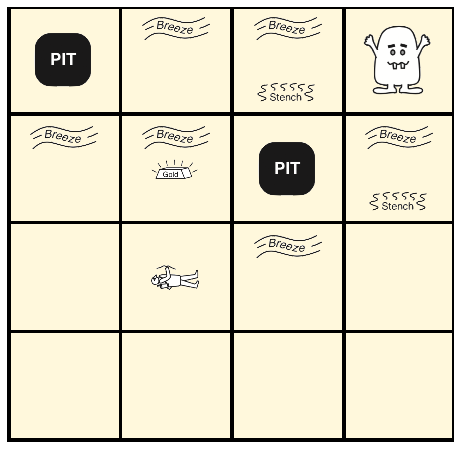

In [32]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
W.pintar_todo()
plt.show()
sleep(.5) 

for i in range(9):
    a = agente.reaccionar(DEB=True)
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    agente.estimar_estado(W)
    W.pintar_todo()
    plt.show()
    sleep(.5) 


Ahora visualizamos en forma de video la exploración por algunos turnos:

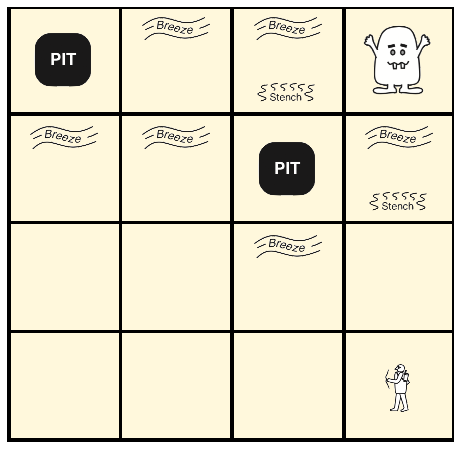

In [33]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
W.pintar_todo()
plt.show()
sleep(.5) 

for i in range(30):
    a = agente.reaccionar()
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        W.pintar_todo()
        print(W.mensaje)
        break
    agente.estimar_estado(W)
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()
    sleep(.5) 

---

# Agente basado en objetivos <a class="anchor" id="goalba"></a>

([Volver al inicio](#inicio))

En este punto ya hemos creado muchos de los aspectos más importantes del agente basado en conocimiento. No obstante, aún se requiere un aspecto muy importante de planeación de rutas. Poder diseñar estos planes es esencial para que el agente pueda devolverse a la casilla inicial y salir de la cueva. 

Al incluir la planeación de objetivos en la arquitectura del agente, estamos un paso más arriba en la jerarquía propuesta por Russell & Norvig. En efecto, estamos considerando una arquitectura de *agente basado en objetivos* (*goal-based agent*). La siguiente imagen presenta un esquema de este tipo de arquitectura:

<img src="./imagenes/goal-based.png" width="400">

**Planeación de rutas**

Planear una ruta desde la casilla actual hasta una casilla objetivo a la cual se desea ir es un problema muy similar a los que ya hemos encontrado en sesiones pasadas. Debemos definir un ambiente de tarea `Rejilla` y luego usar un algoritmo de búsqueda sobre este.

El ambiente se inicializa con una casilla `actual`, una `objetivo` y una lista de casillas `seguras`. Los aspectos más importantes de la definición formal del ambiente de tarea son los siguientes:

* **acciones_aplicables**(`casilla`): Las casillas adyacentes a `casilla` que estén incluidas en la lista `seguras`.
* **heurística**: distancia Manhattan entre las casillas.

**Ejercicio 7:**

Complete la siguiente clase para implementar el ambiente de tarea `Rejilla`:

In [ ]:
def adyacentes_seguras(self):
    



setattr(Agente,"adyacentes_seguras",adyacentes_seguras)

In [41]:
class Rejilla:
    '''
    Problema del tránsito por la rejilla
    desde donde está el héroe hasta una
    casilla objetivo
    Parámetros:
        - inicial, una casilla de la forma (x,y)
        - objetivo, una casilla de la forma (x,y)
        - seguras, una lista de casillas que restringen
                    las acciones aplicables
    '''
    
    def __init__(self, inicial: tuple, objetivo: tuple, seguras: list):
        self.estado_inicial = inicial
        self.estado_objetivo = objetivo
        self.casillas_seguras = seguras
        self.casillas_seguras_set = set(seguras)
    
    def adyacentes(self, casilla: tuple):
        def truncar(x):
            if x < 0:
                return 0
            elif x > 3:
                return 3
            else:
                return x
        x, y = casilla
        adyacentes = [
            (truncar(x - 1), y), (truncar(x + 1), y),
            (x, truncar(y - 1)), (x, truncar(y + 1))
        ]
        adyacentes = [c for c in adyacentes if c != casilla]
        return adyacentes
    
    def acciones_aplicables(self, estado: tuple):
        
        # AQUÍ SU COMIENZA SU CÓDIGO
        return list( set(self.casillas_seguras).intersection(set(self.adyacentes(estado))) )
        # AQUÍ TERMINA SU CÓDIGO

    def transicion(self, estado, accion):
        
        # AQUÍ SU COMIENZA SU CÓDIGO
        return accion
        # AQUÍ TERMINA SU CÓDIGO
       
    def test_objetivo(self, estado):
        
        # AQUÍ SU COMIENZA SU CÓDIGO
        return estado == self.estado_objetivo
        # AQUÍ TERMINA SU CÓDIGO
    
    def costo(self, estado, accion):
    
        # AQUÍ SU COMIENZA SU CÓDIGO
        return 1 #
        # AQUÍ TERMINA SU CÓDIGO
    
    def codigo(self, estado):
        x, y = estado
        return f"{x}-{y}"

In [39]:
def manhattan(estado, accion):
    abs(estado[0] - accion[0]) + abs(estado[1] - accion[1])

 Compruebe su código con la siguiente celda:

In [42]:
from busqueda import greedy_search, solucion, manhattan

seguras = [(x, y) for x in range(4) for y in range(4)]
R = Rejilla((3,2), (0,0), seguras)
camino = greedy_search(R, manhattan)
camino = solucion(camino)
print(camino)

[(2, 2), (2, 1), (2, 0), (1, 0), (0, 0)]


La respuesta debe ser:

```
[(3, 1), (3, 0), (2, 0), (1, 0), (0, 0)]
```

---

**Ejercicio 8:**

Ahora necesitamos encontrar todas las casillas seguras que conozcamos hasta el momento. Implemente el método `todas_segura` para la clase `Agente`.

In [ ]:
def todas_seguras(self):
    pass
    # AQUÍ SU COMIENZA SU CÓDIGO
    # AQUÍ TERMINA SU CÓDIGO

setattr(Agente,"todas_seguras",todas_seguras)

 Pruébe el código con la siguiente celda:

In [ ]:
W = Wumpus(wumpus=(0,2), oro=(2,3), pozos=[(2,0), (3,2)])
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)

agente.turno += 1
a = 'voltearIzquierda'
W.transicion(a)
formula_accion = f'{a}_{agente.turno-1}'
agente.base.TELL(formula_accion)
agente.estimar_estado(W)

agente.turno += 1
a = 'adelante'
W.transicion(a)
formula_accion = f'{a}_{agente.turno-1}'
agente.base.TELL(formula_accion)
agente.estimar_estado(W)

agente.turno += 1
a = 'voltearDerecha'
W.transicion(a)
formula_accion = f'{a}_{agente.turno-1}'
agente.base.TELL(formula_accion)
agente.estimar_estado(W)

agente.turno += 1
a = 'adelante'
W.transicion(a)
formula_accion = f'{a}_{agente.turno-1}'
agente.base.TELL(formula_accion)
agente.estimar_estado(W)

agente.turno += 1
a = 'voltearIzquierda'
W.transicion(a)
formula_accion = f'{a}_{agente.turno-1}'
agente.base.TELL(formula_accion)
agente.estimar_estado(W)

agente.turno += 1
a = 'adelante'
W.transicion(a)
formula_accion = f'{a}_{agente.turno-1}'
agente.base.TELL(formula_accion)
agente.estimar_estado(W)

W.pintar_todo()

print(agente.todas_seguras())

La respuesta debe ser:

```
[(0, 0), (0, 1), (1, 0), (1, 1), (1, 2), (2, 1)]
```

---

Ahora modificamos el programa de agente para incluir el objetivo de que, si ya encontramos el oro, nos vamos derecho a la salida trazando una ruta por las casillas seguras:

In [ ]:
def programaKB(self, DEB=False):
    acciones = []
    turno, casilla_actual, direccion, cas_seguras, cas_visitadas = self.cache()
    if DEB:
        print('Turno acutal:', turno)
        print('Casilla actual:', casilla_actual)
        print('Dirección actual:', direccion)
        print('Casillas adyacentes seguras:', cas_seguras)
        print('Casillas visitadas:', cas_visitadas)
    if ASK(f'brillo_{turno}','success',self.base):
        if DEB:
            print('¡Oh, el oro!')
        acciones.append('agarrar')
        R = Rejilla(casilla_actual, (0,0), self.todas_seguras())
        camino = greedy_search(R, manhattan)
        camino = [casilla_actual] + solucion(camino)
        acciones += acciones_camino(camino, direccion)
        acciones.append('salir')
    else:
        opciones = [casilla for casilla in cas_seguras if casilla not in cas_visitadas]
        if DEB:
            print('Casillas opcionales:', opciones)
        if len(opciones) > 0:
            casilla_ir = choice(opciones)
            if DEB:
                print('El agente quiere ir a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        elif len(cas_seguras) > 0:
            casilla_ir = choice(cas_seguras)
            if DEB:
                print('El agente quiere devolverse a la casilla', casilla_ir)
            camino = [casilla_actual, casilla_ir]
            acciones = acciones_camino(camino, direccion)
        else:
            print("¡Caso no contemplado!")
    self.acciones += acciones

setattr(Agente, 'programa', programaKB)

In [ ]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
W.pintar_todo()
plt.show()
sleep(.5) 

for i in range(30):
    a = agente.reaccionar()
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        W.pintar_todo()
        print(W.mensaje)
        break
    agente.estimar_estado(W)
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()
    sleep(.5) 

---

### En este notebook usted aprendió

* El mundo del Wumpus.
* Uso de la lógica proposicional para representar las reglas del mundo del Wumpus.
* Resolver el problema de trazar una ruta desde la casilla actual hasta la casilla de salida transitando sólo por casillas seguras.
* Incluir en el programa de agente el objetivo de que, una vez tomado el oro, debemos dirigirnos de manera segura a la casilla de salida.